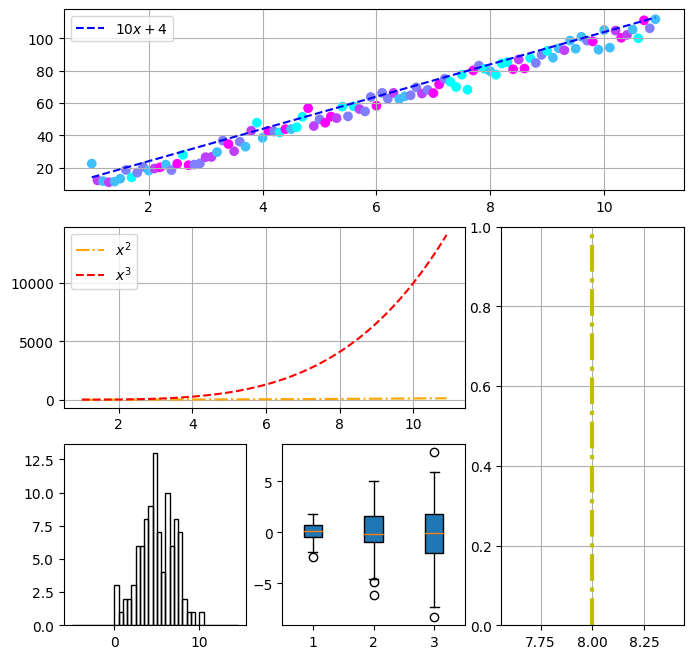

In [61]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 11, 0.1)
z = np.random.randint(5,10,100) 

plt.figure(figsize=(8,8))
ax1 = plt.subplot(3,3,(1,3))
y1 = 10 * x + 4* np.random.randn(100)
ax1.scatter(x, y1, c = z, cmap = 'cool')
ax1.plot(x, 10 * x + 4, '--', color = 'blue', label = '$10x + 4$')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(3,3,(4,5))
ax2.plot(x, x**2, '-.', color = 'orange', label = '$x^2$')
ax2.plot(x, x**4, '--', color = 'red', label = '$x^3$')
ax2.legend()
ax2.grid(True)

ax3 = plt.subplot(3,3,7)
y3 = np.random.randn(100)*2 + 5
ax3.hist(y3, bins = np.arange(-5, 15, 0.5), fill=False)

ax4 = plt.subplot(3,3,8)
y4 = [np.random.normal(0, std, 100) for std in range(1, 4)]
plt.boxplot(y4,vert=True,patch_artist=True);  

ax5 = plt.subplot(3,3,(6,9))
ax5.axvline(8, ls='-.', lw=3, c='y')
ax5.grid(True)

axes = [ax1, ax2, ax3, ax4, ax5]
                       